# Data Loading and Preprocessing

This notebook handles data loading, outlier detection, normalization, and class balancing.

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

## 1. Data Loading and Initial Analysis

In [2]:
# Load data
df = pd.read_csv("data.csv")
print(f"Data loaded: {df.shape[0]} rows, {df.shape[1]} columns")

# Display basic information
print("\nDataset Information:")
print(df.info())

print("\nSample of data:")
print(df.head())

print("\nBasic statistics:")
print(df.describe())

Data loaded: 589876 rows, 11 columns

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589876 entries, 0 to 589875
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CO2          589876 non-null  int64  
 1   TVOC         589876 non-null  int64  
 2   PM10         589876 non-null  float64
 3   PM2.5        589876 non-null  float64
 4   CO           589876 non-null  int64  
 5   Air Quality  589876 non-null  int64  
 6   LDR          589876 non-null  int64  
 7   O3           589876 non-null  int64  
 8   Temp         589876 non-null  float64
 9   Hum          589876 non-null  float64
 10  ts           589876 non-null  object 
dtypes: float64(4), int64(6), object(1)
memory usage: 49.5+ MB
None

Sample of data:
   CO2  TVOC   PM10  PM2.5   CO  Air Quality  LDR   O3  Temp   Hum  \
0  592    29  10.30    9.0  352          148  974  623  24.0  47.2   
1  592    29  10.31   10.1  304          136  

## 2. Air Quality Categorization

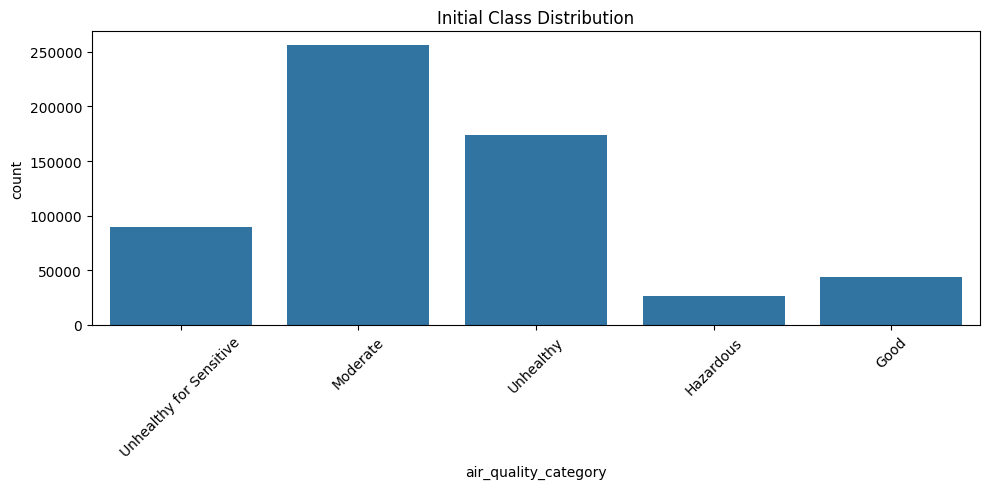


Class distribution:
air_quality_category
Moderate                   255994
Unhealthy                  174047
Unhealthy for Sensitive     89972
Good                        43768
Hazardous                   26095
Name: count, dtype: int64


In [3]:
def categorize_air_quality(value):
    if 0 <= value <= 50:
        return "Good"
    elif 51 <= value <= 100:
        return "Moderate"
    elif 101 <= value <= 150:
        return "Unhealthy for Sensitive"
    elif 151 <= value <= 200:
        return "Unhealthy"
    elif 201 <= value <= 400:
        return "Hazardous"
    else:
        return "Unknown"


# Create categorical labels
df["air_quality_category"] = df["Air Quality"].apply(categorize_air_quality)

# Plot initial distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="air_quality_category")
plt.title("Initial Class Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nClass distribution:")
print(df["air_quality_category"].value_counts())

## 3. Outlier Detection and Handling

Processing outliers...


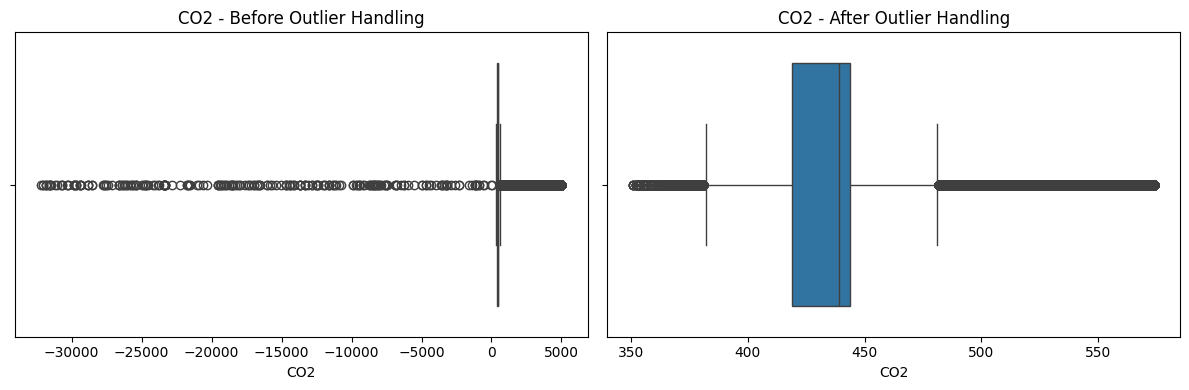


CO2 Statistics:
Outliers before: 109882 (18.63%)
Outliers after: 0 (0.00%)


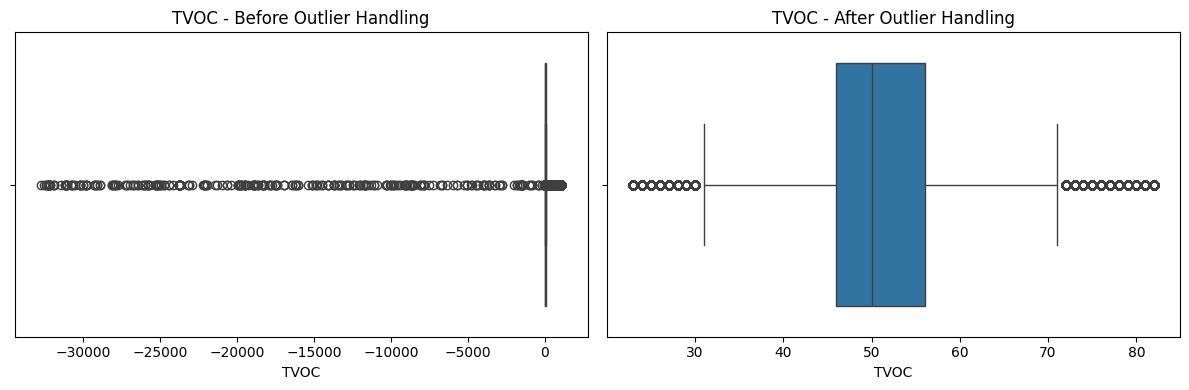


TVOC Statistics:
Outliers before: 90911 (15.41%)
Outliers after: 0 (0.00%)


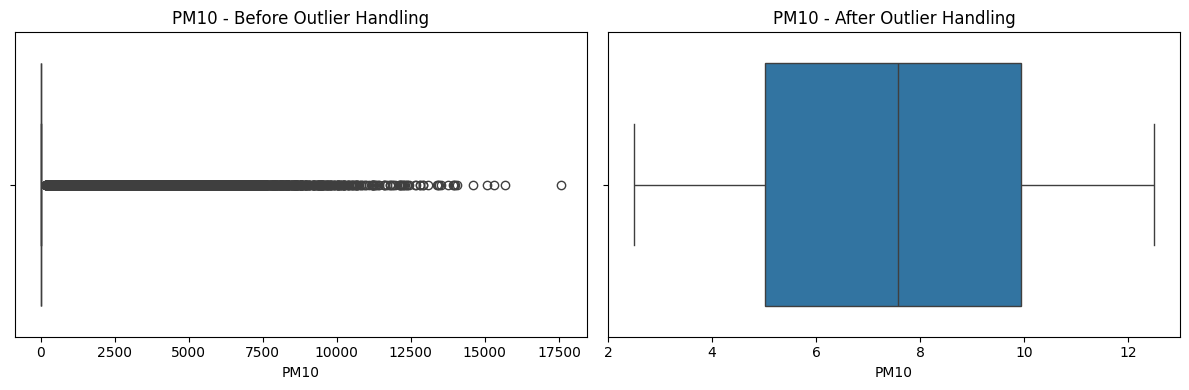


PM10 Statistics:
Outliers before: 10577 (1.79%)
Outliers after: 0 (0.00%)


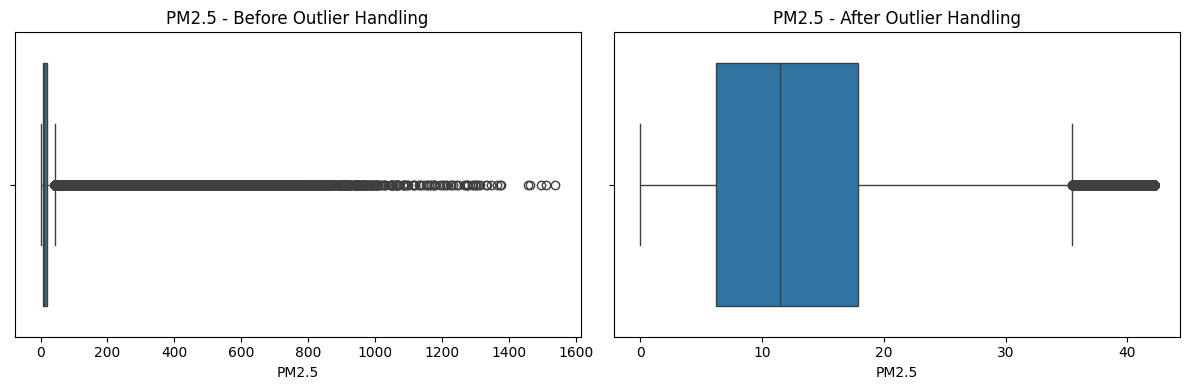


PM2.5 Statistics:
Outliers before: 32598 (5.53%)
Outliers after: 0 (0.00%)


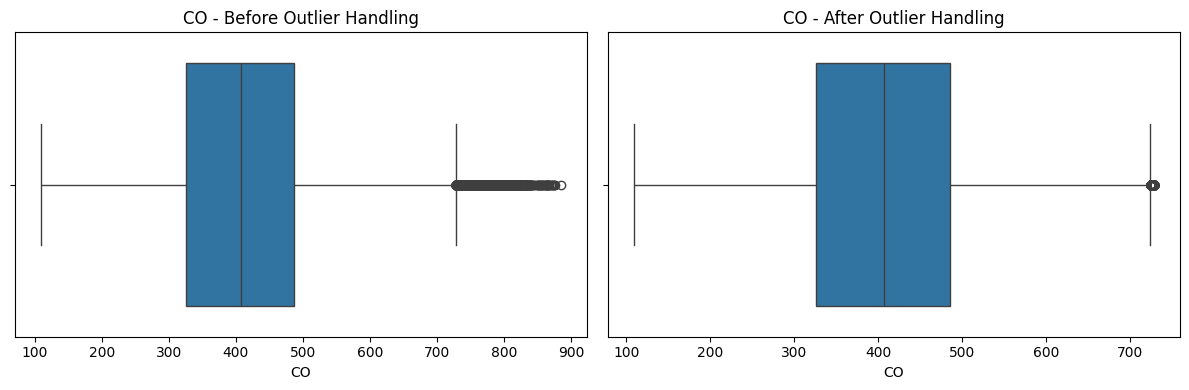


CO Statistics:
Outliers before: 2876 (0.49%)
Outliers after: 0 (0.00%)


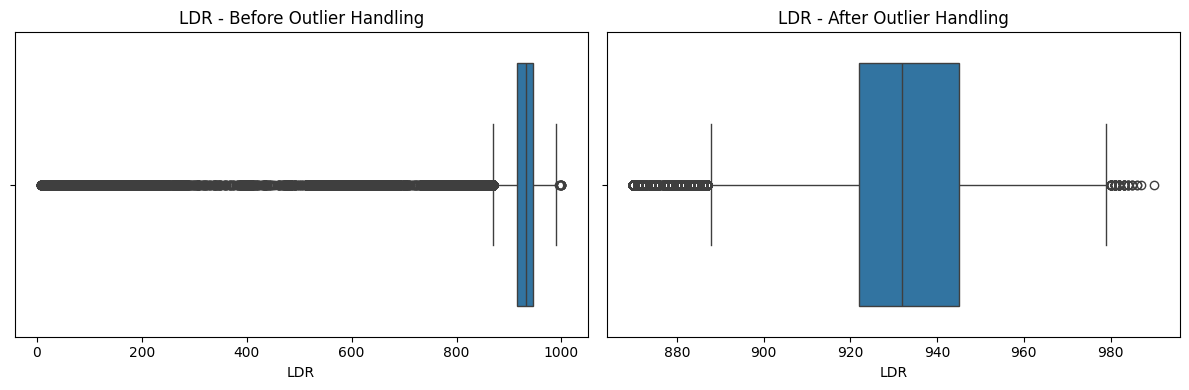


LDR Statistics:
Outliers before: 50727 (8.60%)
Outliers after: 0 (0.00%)


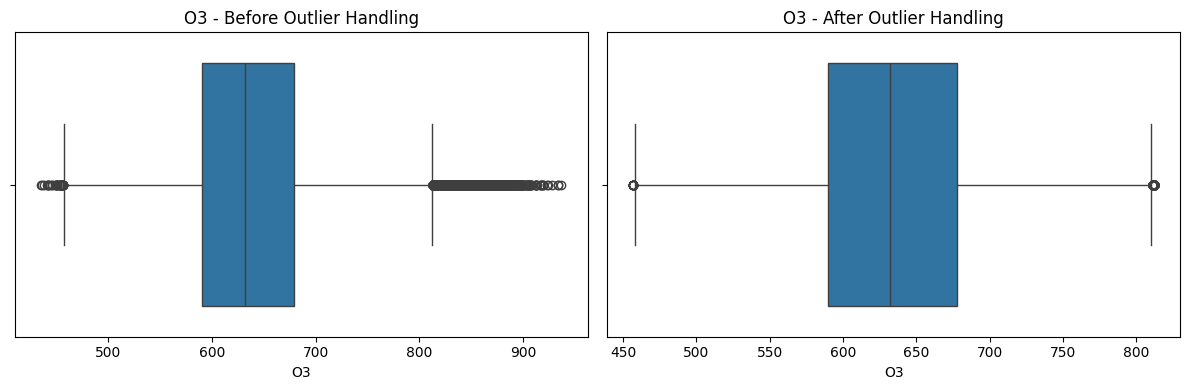


O3 Statistics:
Outliers before: 2792 (0.47%)
Outliers after: 0 (0.00%)


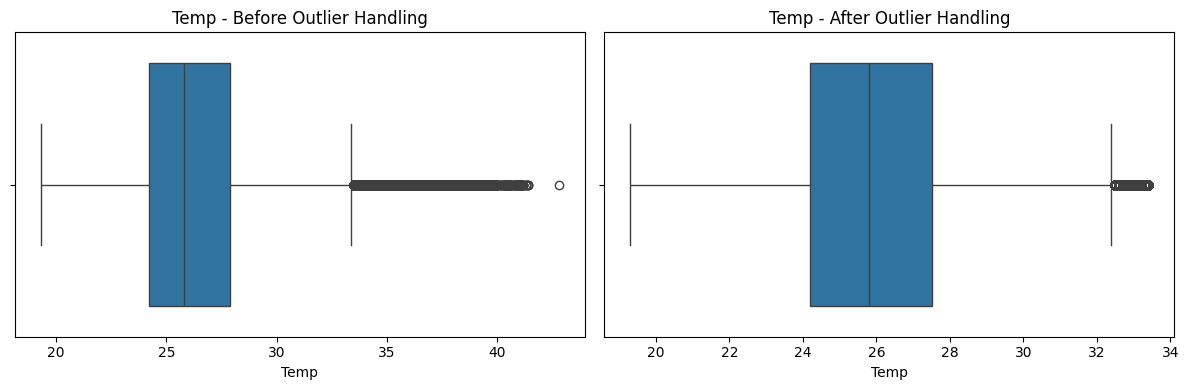


Temp Statistics:
Outliers before: 26438 (4.48%)
Outliers after: 0 (0.00%)


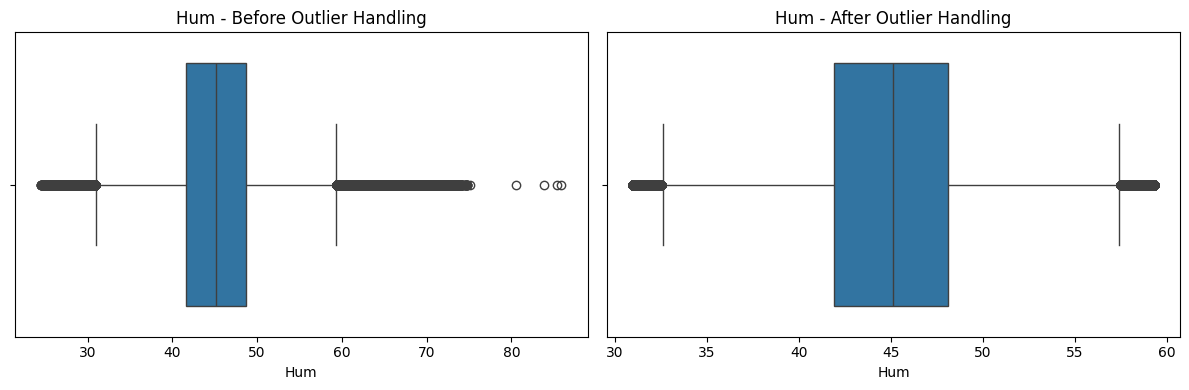


Hum Statistics:
Outliers before: 28241 (4.79%)
Outliers after: 0 (0.00%)


In [4]:
def handle_outliers(df, columns):
    df_clean = df.copy()
    outlier_stats = {}

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        median_val = df[col].median()

        # Plot before and after boxplots
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 2, 1)
        sns.boxplot(x=df[col])
        plt.title(f"{col} - Before Outlier Handling")

        # Replace outliers with median
        df_clean.loc[df_clean[col] < lower_bound, col] = median_val
        df_clean.loc[df_clean[col] > upper_bound, col] = median_val

        plt.subplot(1, 2, 2)
        sns.boxplot(x=df_clean[col])
        plt.title(f"{col} - After Outlier Handling")

        plt.tight_layout()
        plt.show()

        # Calculate statistics
        outliers_before = df[col][
            (df[col] < lower_bound) | (df[col] > upper_bound)
        ].count()
        outliers_after = df_clean[col][
            (df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)
        ].count()

        print(f"\n{col} Statistics:")
        print(
            f"Outliers before: {outliers_before} ({outliers_before/len(df[col])*100:.2f}%)"
        )
        print(
            f"Outliers after: {outliers_after} ({outliers_after/len(df[col])*100:.2f}%)"
        )

    return df_clean


# Define features
features = ["CO2", "TVOC", "PM10", "PM2.5", "CO", "LDR", "O3", "Temp", "Hum"]

# Handle outliers
print("Processing outliers...")
X = handle_outliers(df[features], features)

## 4. Feature Normalization

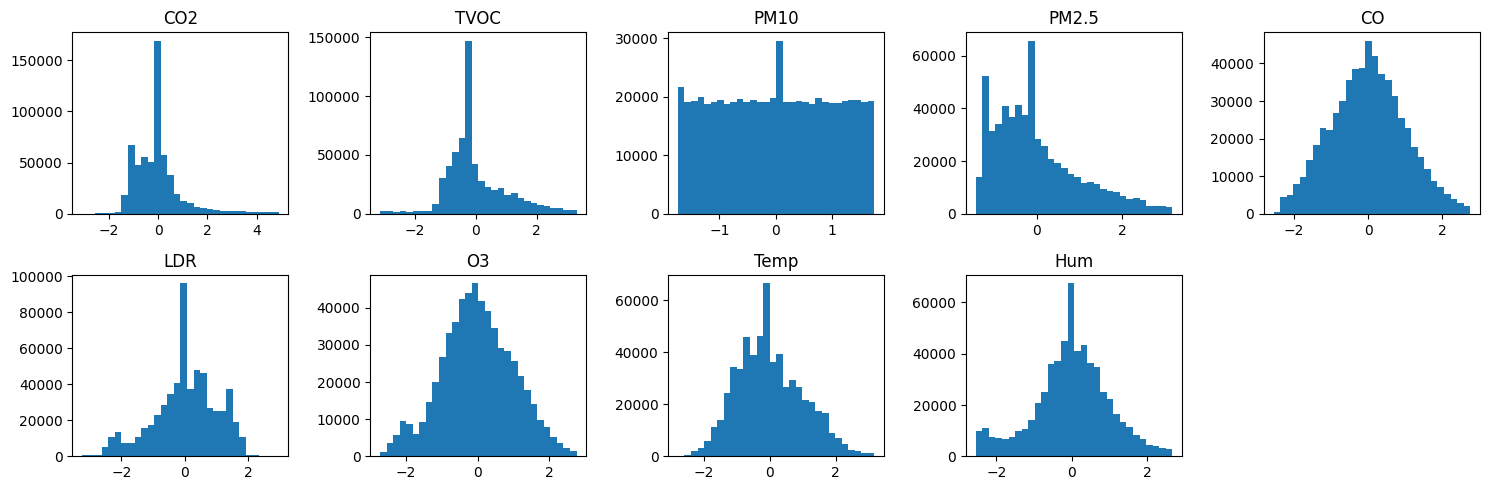

In [5]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Prepare classification target
le = LabelEncoder()
y = le.fit_transform(df["air_quality_category"])

# Plot distribution of scaled features
plt.figure(figsize=(15, 5))
for i, feature in enumerate(features):
    plt.subplot(2, 5, i + 1)
    plt.hist(X_scaled[:, i], bins=30)
    plt.title(feature)
plt.tight_layout()
plt.show()

## 5. Train-Test Split and SMOTE

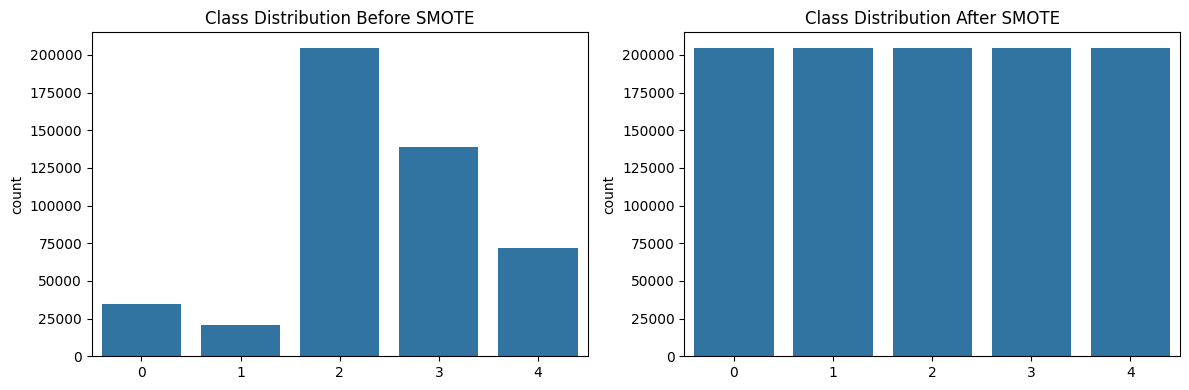


Class distribution after SMOTE:
3    204795
2    204795
4    204795
0    204795
1    204795
Name: count, dtype: int64


In [7]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Plot class distribution before SMOTE
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title("Class Distribution Before SMOTE")

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Plot class distribution after SMOTE
plt.subplot(1, 2, 2)
sns.countplot(x=y_train_balanced)
plt.title("Class Distribution After SMOTE")

plt.tight_layout()
plt.show()

print("\nClass distribution after SMOTE:")
print(pd.Series(y_train_balanced).value_counts())

# Save preprocessed data
np.save("preprocessed/X_train.npy", X_train_balanced)
np.save("preprocessed/X_test.npy", X_test)
np.save("preprocessed/y_train.npy", y_train_balanced)
np.save("preprocessed/y_test.npy", y_test)